# <h1><center>Heart Attack Dataset -- Exploratory Data Analysis</center></h1>

### <center>By: Hio Wa Mak</center>

## Import packages

In [1]:
#Import pandas, matplotlib.pyplot, and seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import statsmodels.api as sm # Module for running linear regression
from statsmodels.graphics.api import abline_plot # Add reference line to a plot
from sklearn.metrics import mean_squared_error, r2_score # calculate mean squared error and r square
from sklearn.model_selection import train_test_split #  split data into training and testing sets
from sklearn import linear_model, preprocessing # Linear_model is used to run OLS models and preprocessing can help process the data before running models
import warnings # For handling error messages.
# Don't worry about the following two instructions: they just suppress warnings that could occur later. 
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

## Read in the data

In [2]:
# Read in data from a csv file
heart = pd.read_csv('../data/heartattack_cleaned.csv')

### Examine details about the heart attack dataset

In [3]:
#Examine info on this dataset
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442067 entries, 0 to 442066
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      442067 non-null  object 
 1   Sex                        442067 non-null  object 
 2   GeneralHealth              440972 non-null  object 
 3   PhysicalHealthDays         431470 non-null  float64
 4   MentalHealthDays           433275 non-null  float64
 5   LastCheckupTime            434026 non-null  object 
 6   PhysicalActivities         441095 non-null  object 
 7   SleepHours                 436871 non-null  float64
 8   RemovedTeeth               431057 non-null  object 
 9   HadHeartAttack             442067 non-null  object 
 10  HadAngina                  438479 non-null  object 
 11  HadStroke                  440997 non-null  object 
 12  HadAsthma                  440630 non-null  object 
 13  HadSkinCancer              43

In [4]:
#Number of columns and observations
heart.shape

(442067, 34)

In [5]:
#Look at the first few observations
heart.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,No,Never smoked,Not at all (right now),No,"White only, Non-Hispanic",Age 80 or older,NaN,NaN,NaN,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 80 or older,1.60,68.04,26.57,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 55 to 59,1.57,63.50,25.61,No
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,No,Current smoker - now smokes some days,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",NaN,1.65,63.50,23.30,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,No,Never smoked,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",Age 40 to 44,1.57,53.98,21.77,Yes


## Data exploration and visualization

### The dependent variable -- HadHeartAttack

HadHeartAttack
No     416959
Yes     25108
Name: count, dtype: int64
HadHeartAttack
No     94.320318
Yes     5.679682
Name: proportion, dtype: float64


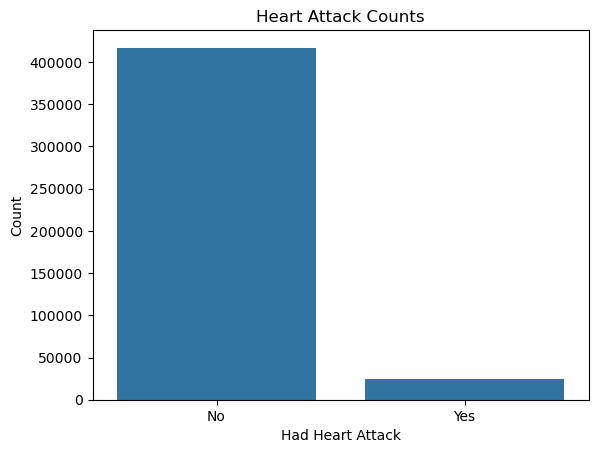

In [6]:
print(heart['HadHeartAttack'].value_counts())

print(heart['HadHeartAttack'].value_counts(normalize=True)*100)

#Examine counts of people had heart attack
heart_count = heart['HadHeartAttack'].value_counts()

#Heart attack distribution
sns.barplot(x=heart_count.index, y=heart_count.values)
plt.xlabel('Had Heart Attack')
plt.ylabel('Count')
plt.title('Heart Attack Counts')
plt.show()

5.7% of participants had an heart attack.

### Explore all categorical variables in the dataset

In [7]:
#Write a function to plot through freqeuncy across all categorical variables
def plot_categorical_variables(df):
    '''A function that calculate the frequency and percentage of each category across all categorical variables'''
    # Get the list of categorical columns
    categorical_columns = df.select_dtypes(include=['object']).columns
    
    # Loop through each categorical column
    for column in categorical_columns:
        counts = df[column].value_counts()
        percs = df[column].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
        # Print column name as title
        print(f"\033[1m{column.center(50)}\033[0m")
        # Print an empty line
        print()
        # Print the statistics
        print(pd.concat([counts,percs], axis=1, keys=['count', 'percentage']))
        
    # Add a separator
        print("\n" + "="*50 + "\n")
              
plot_categorical_variables(heart)  

                      State                       

                      count percentage
State                                 
Washington            25997       5.9%
New York              17631       4.0%
Minnesota             16738       3.8%
Ohio                  16394       3.7%
Maryland              16299       3.7%
Texas                 14129       3.2%
Florida               13282       3.0%
Wisconsin             11210       2.5%
Kansas                11179       2.5%
Massachusetts         10958       2.5%
California            10853       2.5%
Maine                 10584       2.4%
Indiana               10378       2.3%
Virginia              10353       2.3%
Arizona               10089       2.3%
South Carolina         9967       2.3%
Michigan               9958       2.3%
Utah                   9773       2.2%
Connecticut            9702       2.2%
Colorado               9310       2.1%
Georgia                9163       2.1%
Iowa                   8882       2.0%
Vermont     

                 AlcoholDrinkers                  

                  count percentage
AlcoholDrinkers                   
Yes              210023      53.0%
No               186107      47.0%




### Explore continuous variables

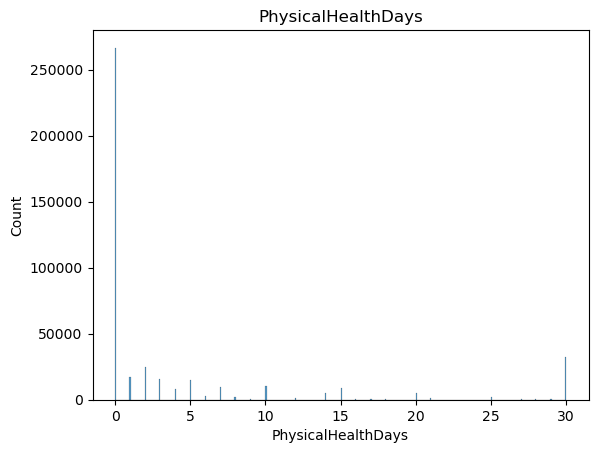

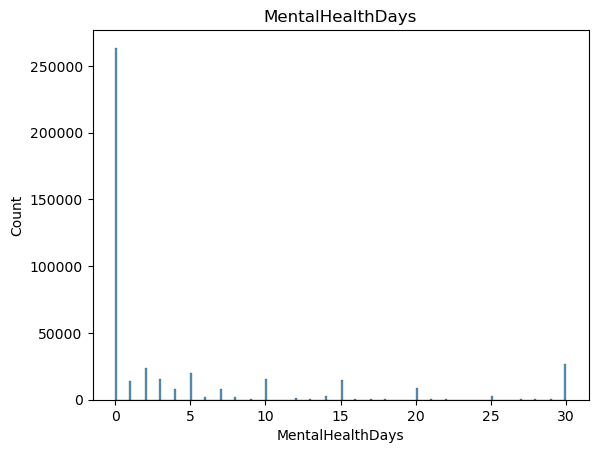

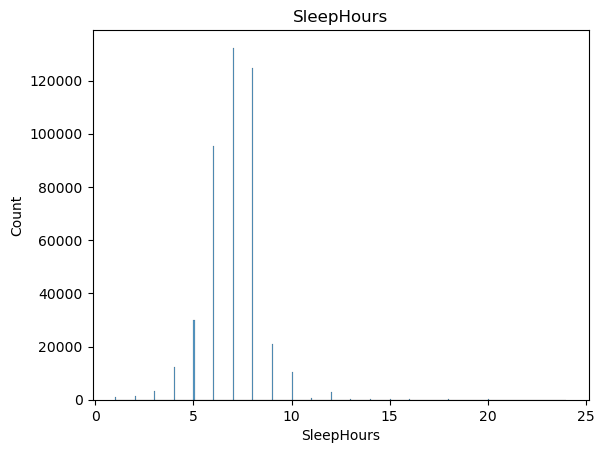

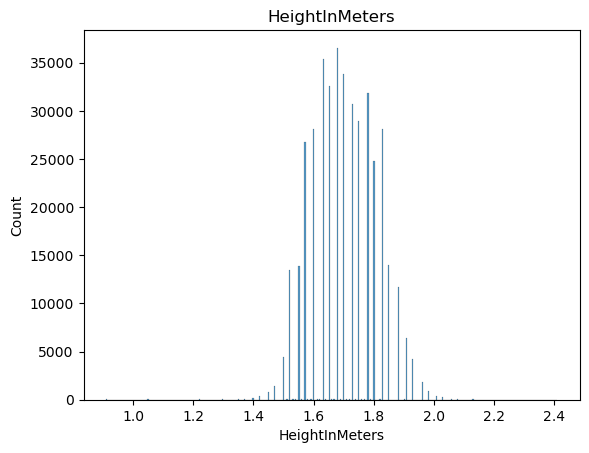

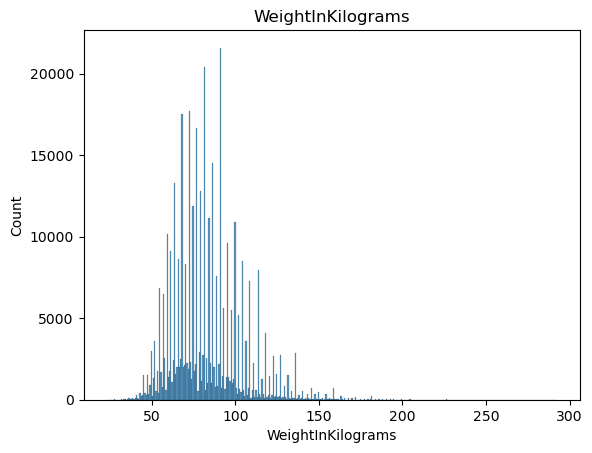

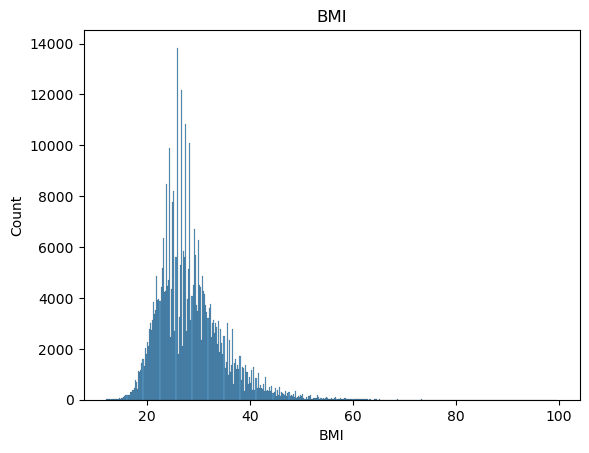

In [8]:
### Explore continuous variables
cont_columns = heart.select_dtypes(include=['float64']).columns

# Loop through each continuous variables
for column in cont_columns:
    sns.histplot(heart[column])
    plt.title(column)
    plt.show()

There are outliers in BMI, making the distribution quite skewed. Let's take a closer look at BMI outliers.

In [9]:
#look at some outliers in BMI 
bmidata = heart[['HeightInMeters', 'WeightInKilograms', 'BMI']]
print(heart['BMI'].describe())
print(bmidata[bmidata['BMI']>90])

count    393957.000000
mean         28.527818
std           6.550960
min          12.020000
25%          24.130000
50%          27.440000
75%          31.740000
max          99.640000
Name: BMI, dtype: float64
        HeightInMeters  WeightInKilograms    BMI
865               1.22             136.08  91.55
12169             1.65             250.00  91.72
21894             1.55             227.25  94.66
30638             1.57             226.80  91.45
38649             1.57             229.97  92.73
44720             0.91              81.65  97.65
50647             1.07             111.13  97.65
65762             1.07             108.86  95.66
66029             1.37             186.88  99.34
76387             1.52             226.80  97.65
83747             1.04             104.33  96.20
113540            1.42             185.07  91.47
160913            1.05              99.34  90.10
184639            0.91              81.65  97.65
201482            1.73             272.00  91.18
213231

The 'outliers' of BMI do not appear to be data entry errors. It maybe a good idea to recode BMI into categories when doing recoding afterwards.

### Visualize participants demographic distributions

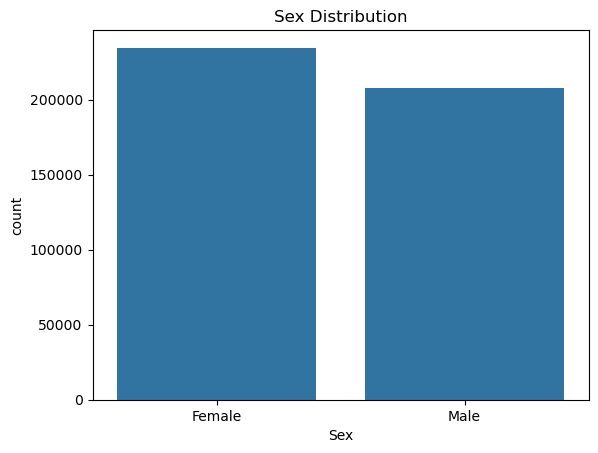

In [10]:
#Sex distribution
sns.countplot(x='Sex', data=heart)
plt.title('Sex Distribution')
plt.show()

As seen in previous descriptive statistics, approximately 53% of participants were female.

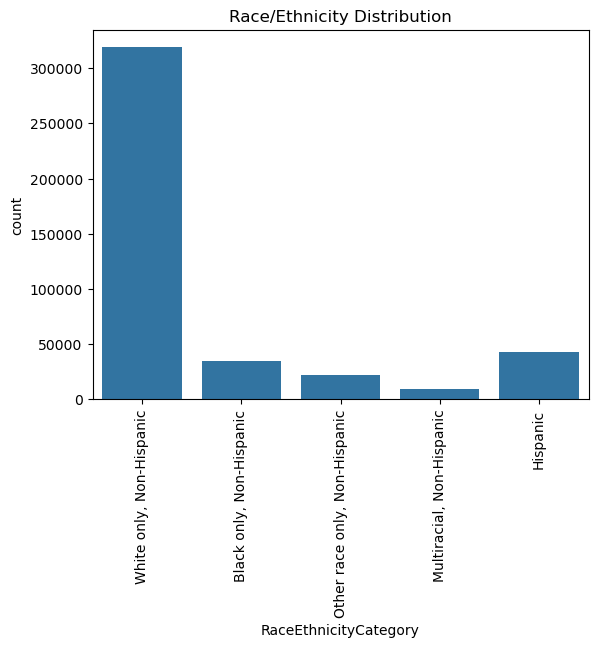

In [11]:
#Race/Ethnicity distribution
sns.countplot(x='RaceEthnicityCategory', data=heart)
plt.title('Race/Ethnicity Distribution')
plt.xticks(rotation=90)
plt.show()

Most participants (74.4%) were Non-Hispanic White. 

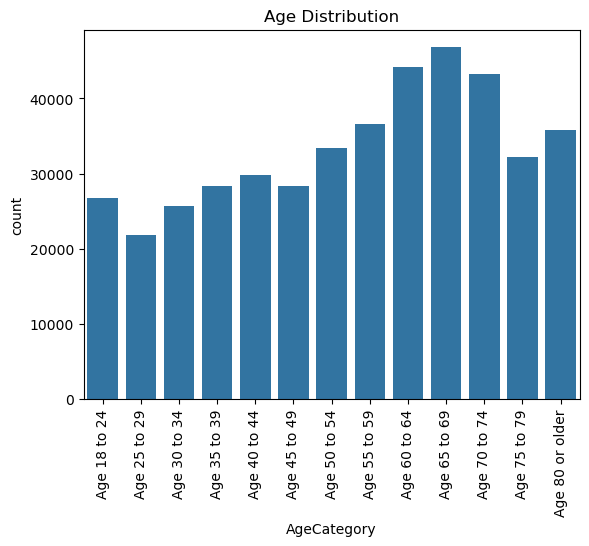

In [12]:
#Age distribution
cat_order = ['Age 18 to 24', 'Age 25 to 29', 'Age 30 to 34', 'Age 35 to 39', 'Age 40 to 44',
             'Age 45 to 49', 'Age 50 to 54', 'Age 55 to 59', 'Age 60 to 64', 'Age 65 to 69', 
             'Age 70 to 74', 'Age 75 to 79', 'Age 80 or older']
sns.countplot(x='AgeCategory', data=heart, order = cat_order)
plt.title('Age Distribution')
plt.xticks(rotation=90)
plt.show()

There were more participants in the Age 55 to Age 75 groups.

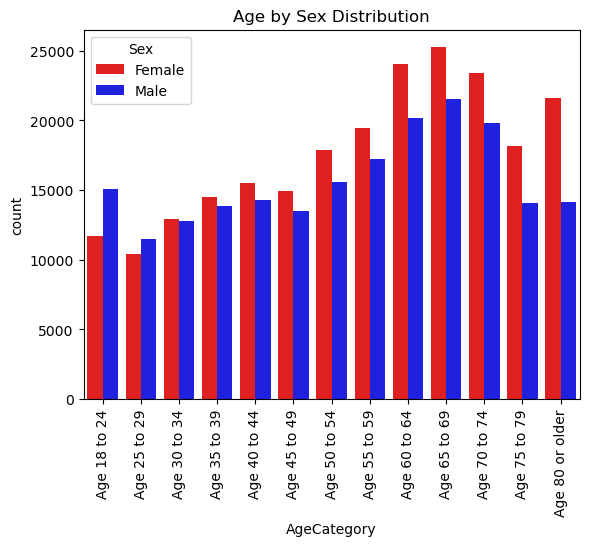

In [13]:
#Age by sex distribution

# Define a custom color palette
custom_palette = {'Male': 'Blue', 'Female': 'Red'}

#Plot
cat_order = ['Age 18 to 24', 'Age 25 to 29', 'Age 30 to 34', 'Age 35 to 39', 'Age 40 to 44',
             'Age 45 to 49', 'Age 50 to 54', 'Age 55 to 59', 'Age 60 to 64', 'Age 65 to 69', 
             'Age 70 to 74', 'Age 75 to 79', 'Age 80 or older']
sns.countplot(x='AgeCategory', data=heart, hue='Sex', order = cat_order, palette=custom_palette)
plt.title('Age by Sex Distribution')
plt.xticks(rotation=90)
plt.show()

More females than males participated in the study, except for young adults aged 18 to 30.

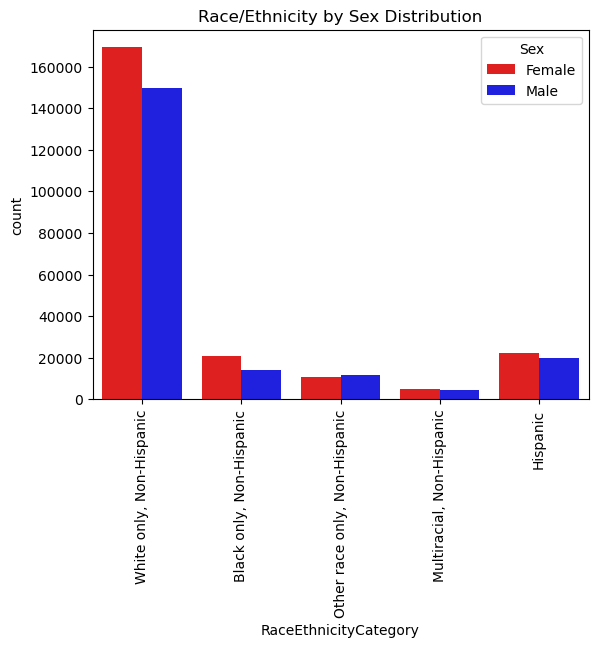

In [14]:
#Race/Ethnicity by sex distribution
sns.countplot(x='RaceEthnicityCategory', hue='Sex', data=heart, palette=custom_palette)
plt.title('Race/Ethnicity by Sex Distribution')
plt.xticks(rotation=90)
plt.show()

### Distributions of other non-binary categorical variables

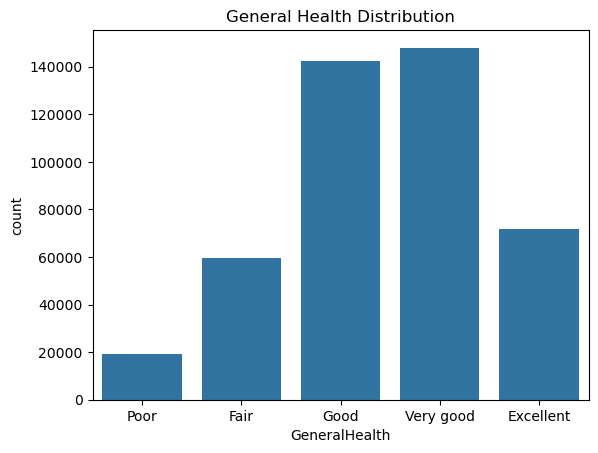

In [15]:
#Subjective Health
cat_order = ['Poor', 'Fair', 'Good', 'Very good', 'Excellent']

sns.countplot(x='GeneralHealth', data=heart, order = cat_order)
plt.title('General Health Distribution')
plt.show()

Most participants reported that their health was good (32%) and very good (34%).

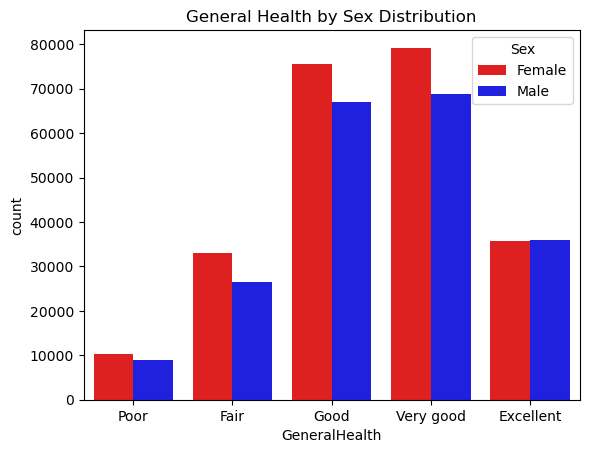

In [16]:
#Subjective Health by Sex
cat_order = ['Poor', 'Fair', 'Good', 'Very good', 'Excellent']

sns.countplot(x='GeneralHealth', data=heart, hue='Sex', order = cat_order, palette=custom_palette)
plt.title('General Health by Sex Distribution')
plt.show()

Because females are overrepresented in the sample, so it is unclear whether females in fact perceived themselves to be healthier than males.

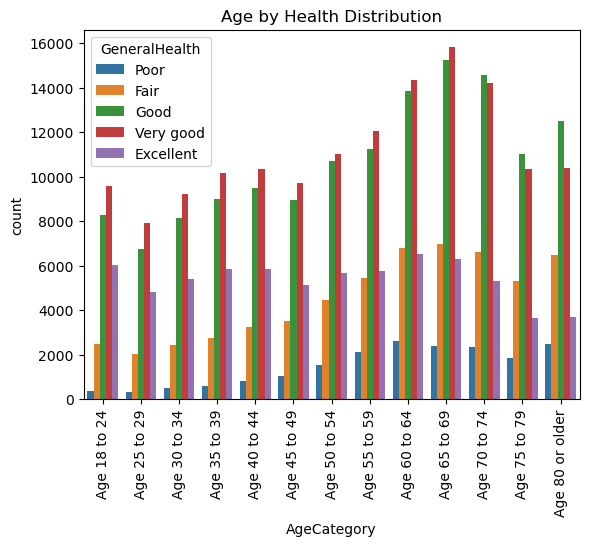

In [17]:
#Subjective Health by Age
age_order = ['Age 18 to 24', 'Age 25 to 29', 'Age 30 to 34', 'Age 35 to 39', 'Age 40 to 44',
             'Age 45 to 49', 'Age 50 to 54', 'Age 55 to 59', 'Age 60 to 64', 'Age 65 to 69', 
             'Age 70 to 74', 'Age 75 to 79', 'Age 80 or older']

health_order = ['Poor', 'Fair', 'Good', 'Very good', 'Excellent']

sns.countplot(x='AgeCategory', data=heart, hue='GeneralHealth', 
              order = age_order, hue_order=health_order)
plt.title('Age by Health Distribution')
plt.xticks(rotation=90)
plt.show()

There's not much we could see here. Consider recoding GeneralHealth into numeric variable.

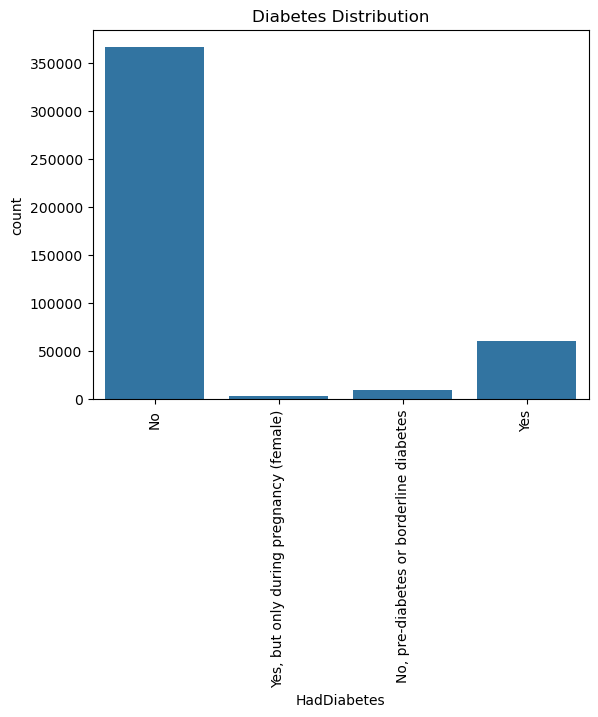

In [18]:
#Had Diabetes
cat_order = ['No', 'Yes, but only during pregnancy (female)', 
             'No, pre-diabetes or borderline diabetes', 'Yes']
sns.countplot(x='HadDiabetes', data=heart, order = cat_order)
plt.title('Diabetes Distribution')
plt.xticks(rotation=90)
plt.show()

13.7% of the participants had diabetes.

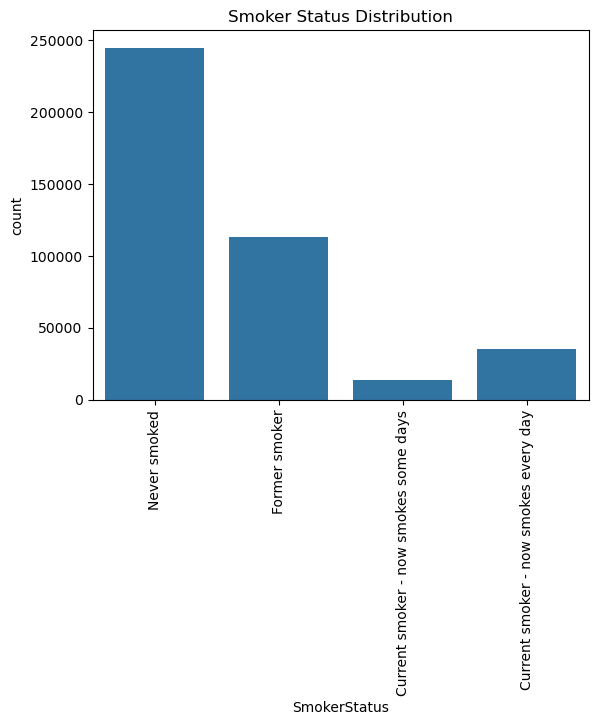

In [19]:
#Smoker Status
cat_order = ['Never smoked', 'Former smoker', 'Current smoker - now smokes some days',
             'Current smoker - now smokes every day']
sns.countplot(x='SmokerStatus', data=heart, order = cat_order)
plt.title('Smoker Status Distribution')
plt.xticks(rotation=90)
plt.show()

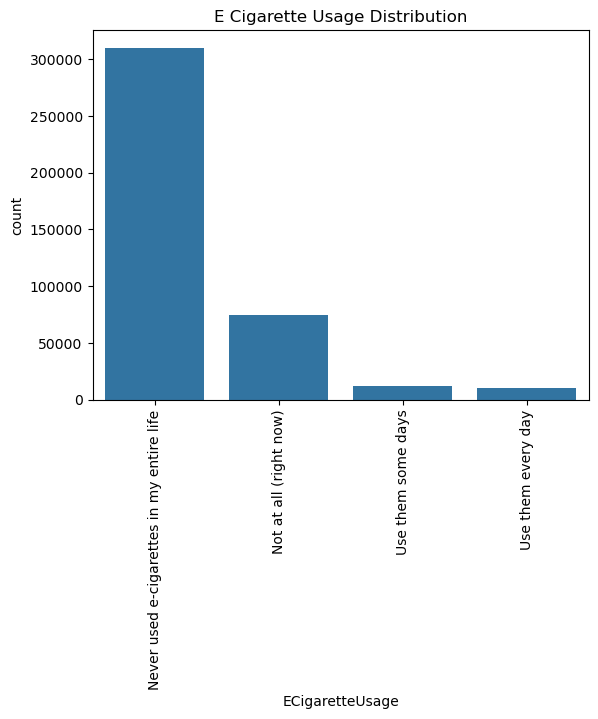

In [20]:
#E cigarettes
cat_order = ['Never used e-cigarettes in my entire life', 'Not at all (right now)',
             'Use them some days', 'Use them every day']
sns.countplot(x='ECigaretteUsage', data=heart, order = cat_order)
plt.title('E Cigarette Usage Distribution')
plt.xticks(rotation=90)
plt.show()

The majority of participants had not used cigarettes or e-cigarettes.

### Examine the relationship between heart attack and potential predictors

Heart Attack and Angina are likely related. Let's examine their relationship.

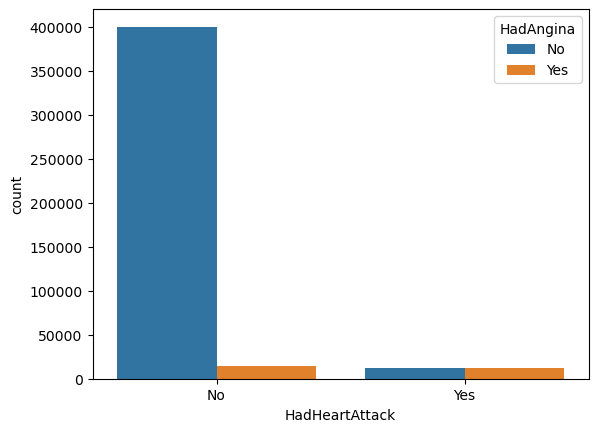

In [21]:
#Plot a count plot to examine the relationship between heart attack and angina
sns.countplot(x='HadHeartAttack', hue='HadAngina', data=heart)
plt.show()

### Demographics and Heart Attack

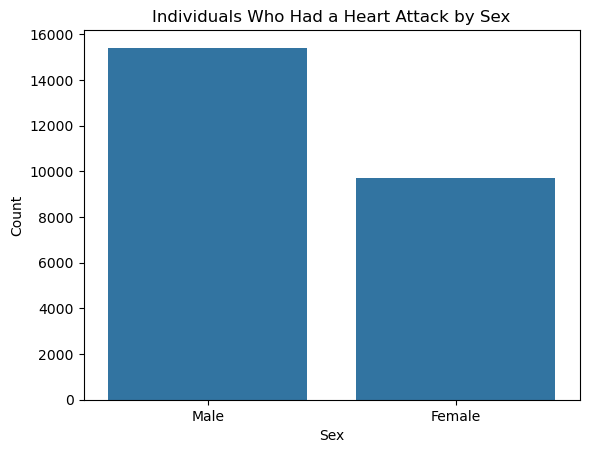

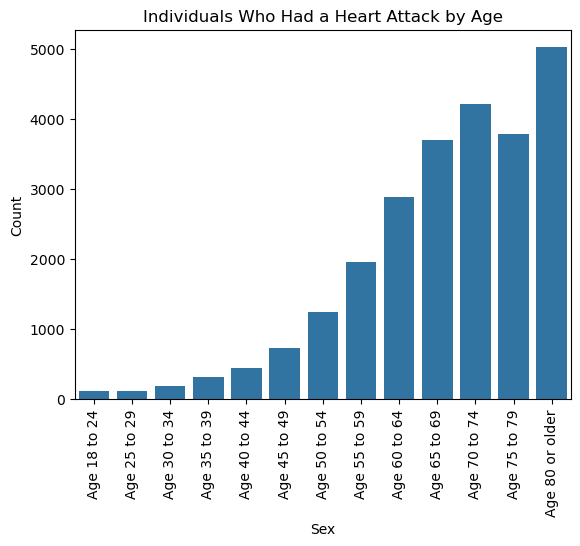

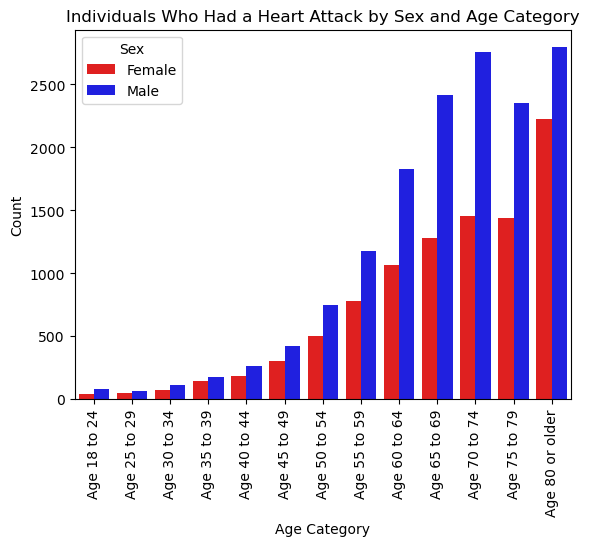

In [22]:
# Filter DataFrame for individuals who had a heart attack
heart_attack = heart[heart['HadHeartAttack'] == 'Yes']

#Heart Attack by Sex
sex_counts = heart_attack['Sex'].value_counts()

sns.barplot(x=sex_counts.index, y=sex_counts.values)
plt.title('Individuals Who Had a Heart Attack by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

#Heart Attack by Age
age_counts = heart_attack['AgeCategory'].value_counts()

cat_order = ['Age 18 to 24', 'Age 25 to 29', 'Age 30 to 34', 'Age 35 to 39', 'Age 40 to 44',
             'Age 45 to 49', 'Age 50 to 54', 'Age 55 to 59', 'Age 60 to 64', 'Age 65 to 69', 
             'Age 70 to 74', 'Age 75 to 79', 'Age 80 or older']
sns.barplot(x=age_counts.index, y=age_counts.values, order = cat_order)
plt.title('Individuals Who Had a Heart Attack by Age')
plt.xticks(rotation=90)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

#Heart Attack by Sex and Age
heart_attack_counts = heart_attack.groupby(['Sex', 'AgeCategory']).size().reset_index(name='Count')
# Define a custom color palette
custom_palette = {'Male': 'Blue', 'Female': 'Red'}

ax = sns.barplot(x='AgeCategory', y='Count', hue='Sex', data=heart_attack_counts, palette=custom_palette)
plt.title('Individuals Who Had a Heart Attack by Sex and Age Category')
plt.xticks(rotation=90)
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.legend(title='Sex')
plt.show()

Note that Females are less represented in the dataset. However, females tended to have lower rates of heart attack, and sex differences in heart attack rates increases as age increases until about Age 80. Then, gender differences narrowed but maintained.

### Explore the relationships between categorical predictors and heart attack

                    HadAngina                     


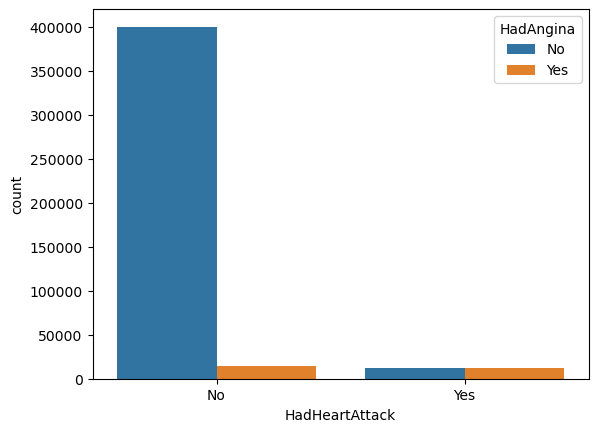


                    HadStroke                     


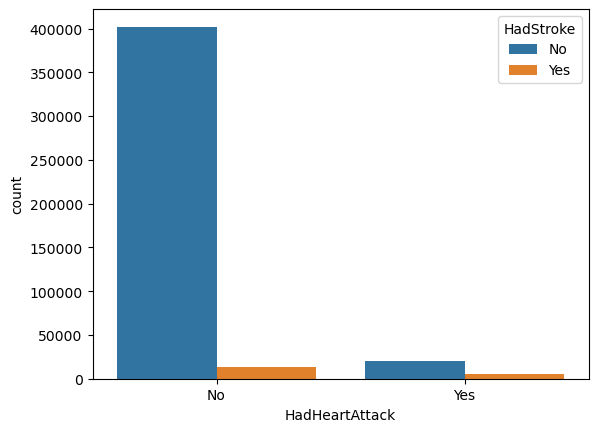


                    HadAsthma                     


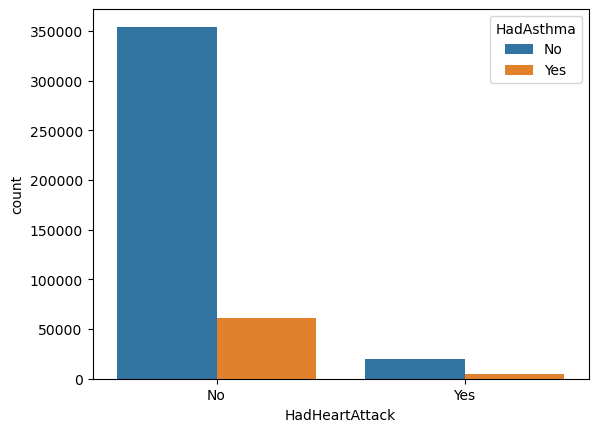


                  HadSkinCancer                   


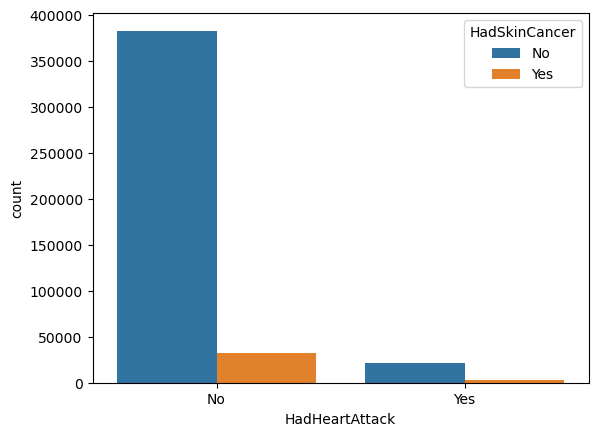


                     HadCOPD                      


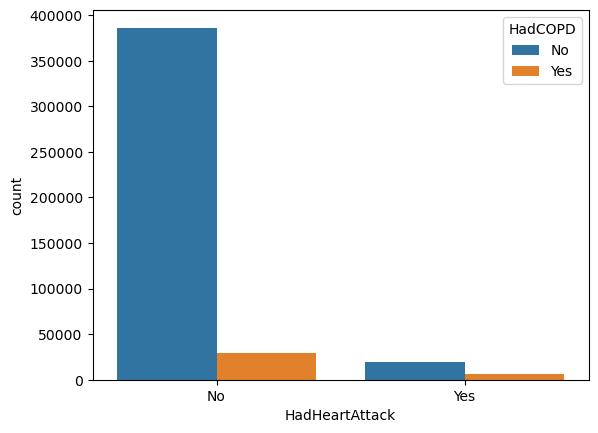


                 HadKidneyDisease                 


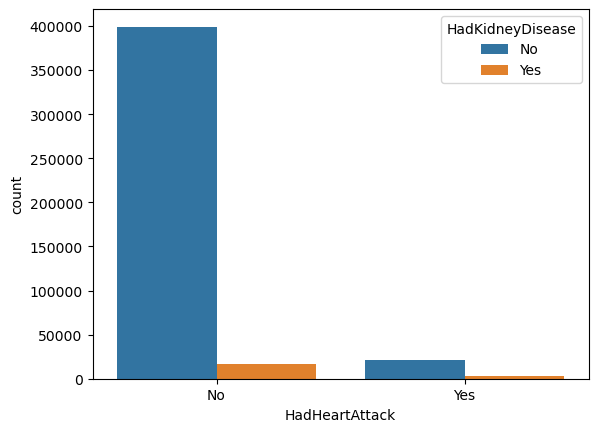


                   HadArthritis                   


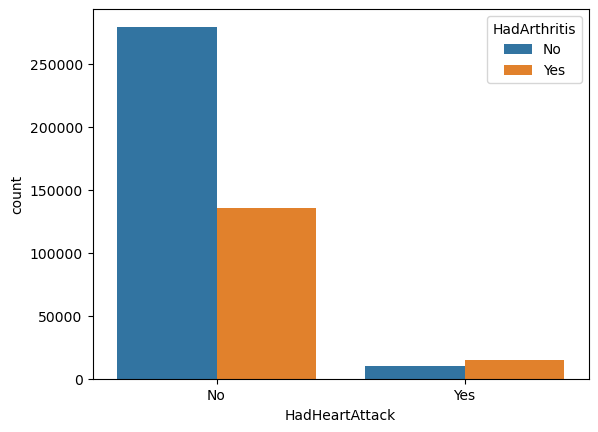


                   HadDiabetes                    


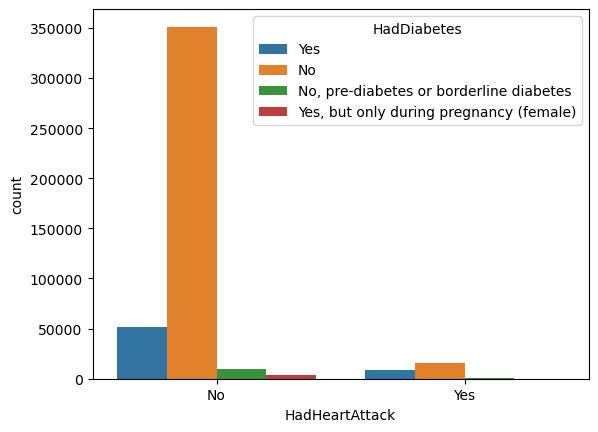


              HadDepressiveDisorder               


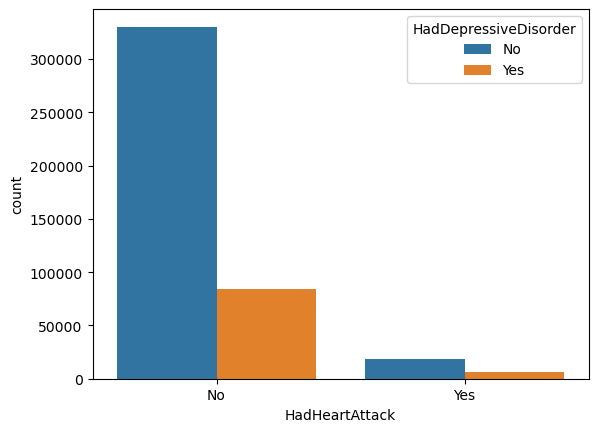


               DeafOrHardOfHearing                


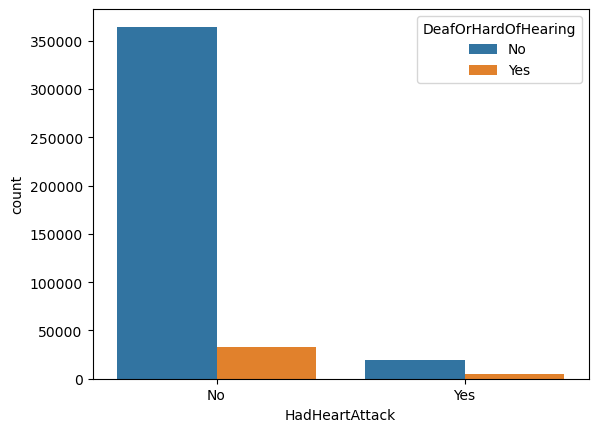


             BlindOrVisionDifficulty              


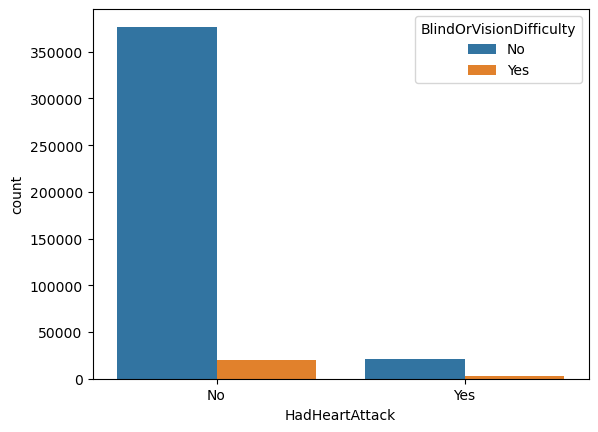


             DifficultyConcentrating              


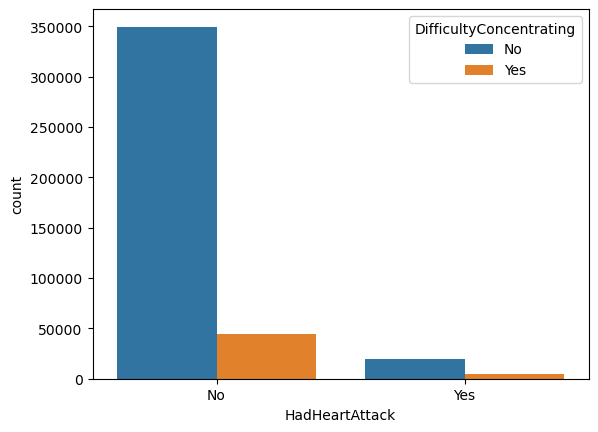


                DifficultyWalking                 


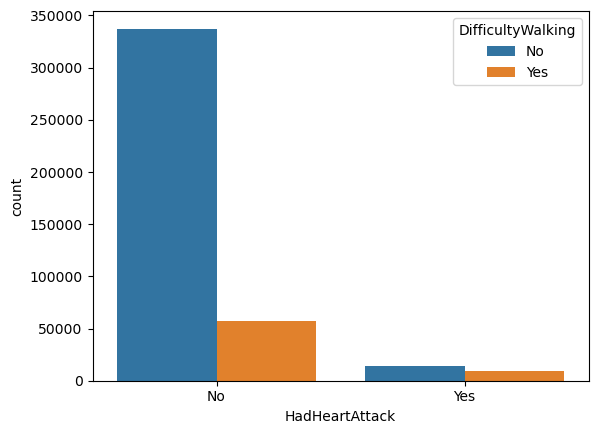


            DifficultyDressingBathing             


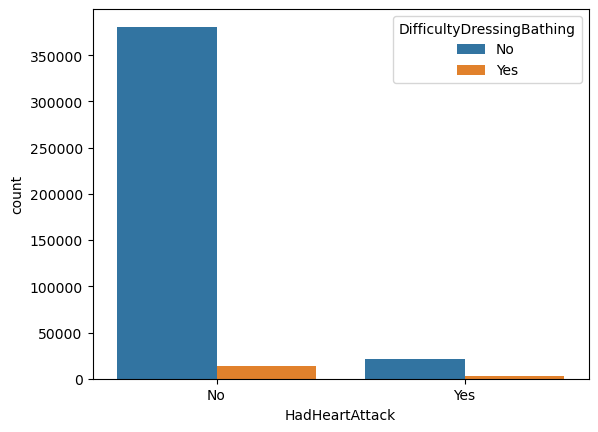


                DifficultyErrands                 


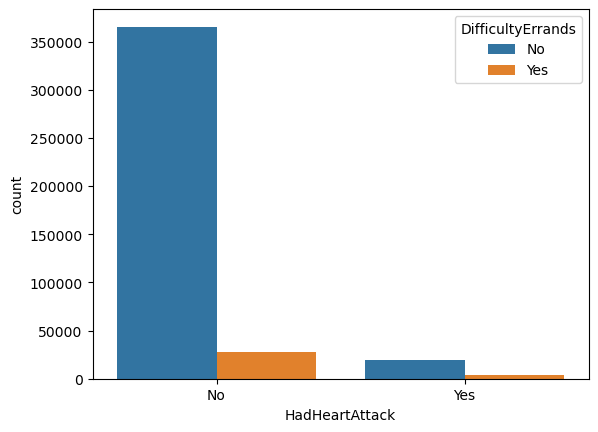


                PhysicalActivities                


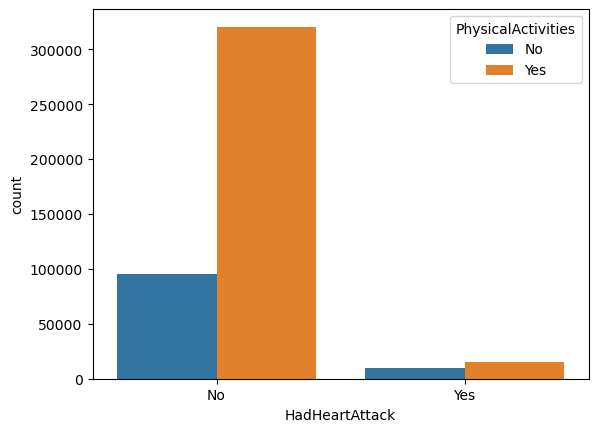


                  GeneralHealth                   


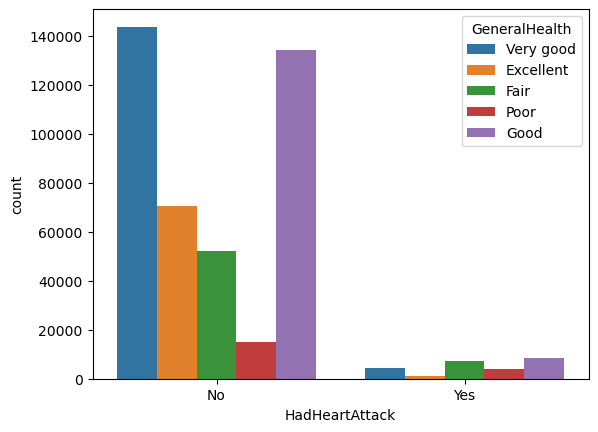


                   RemovedTeeth                   


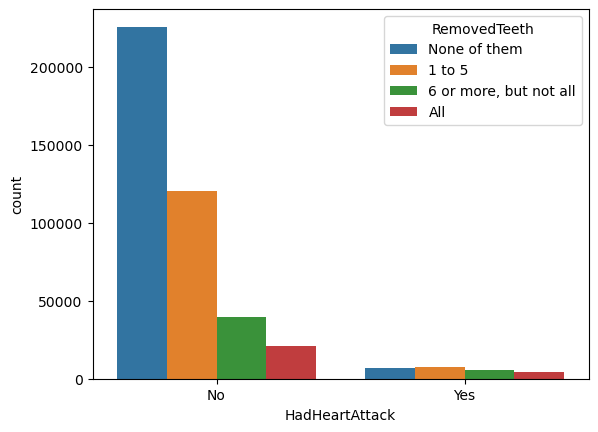


                 LastCheckupTime                  


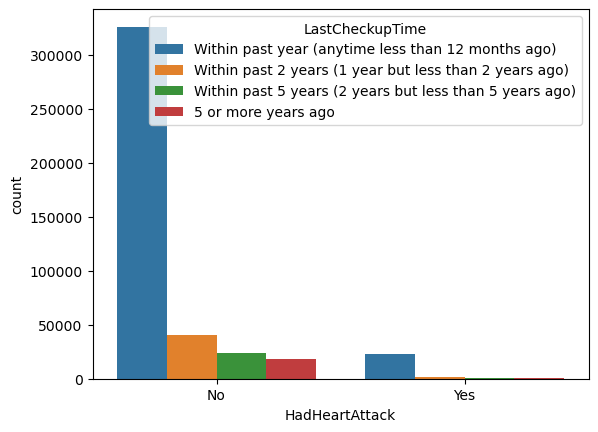


                    ChestScan                     


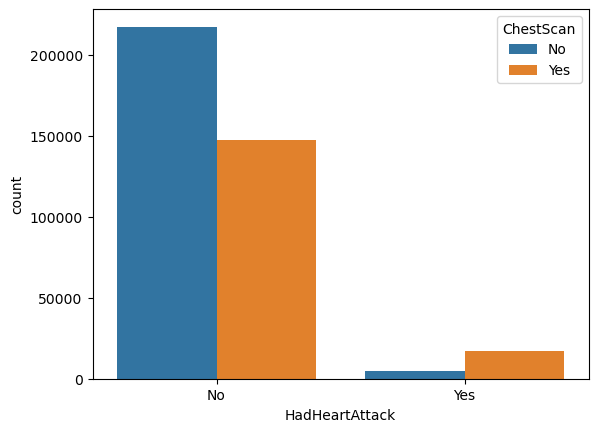


                   SmokerStatus                   


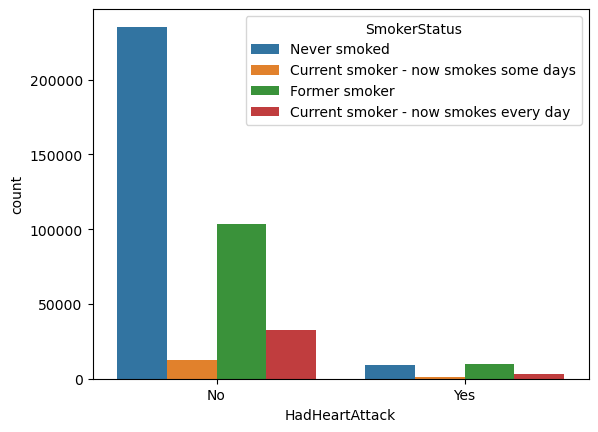


                 ECigaretteUsage                  


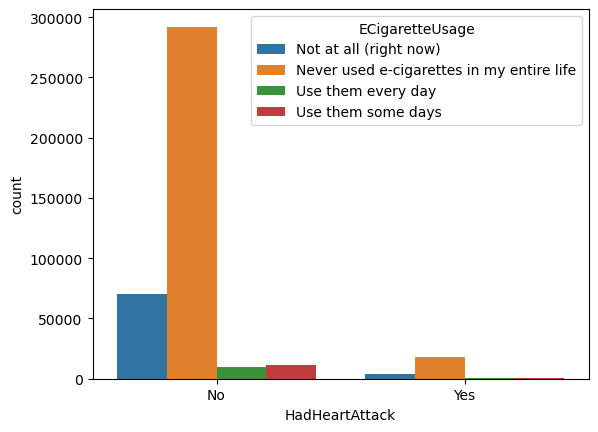


                 AlcoholDrinkers                  


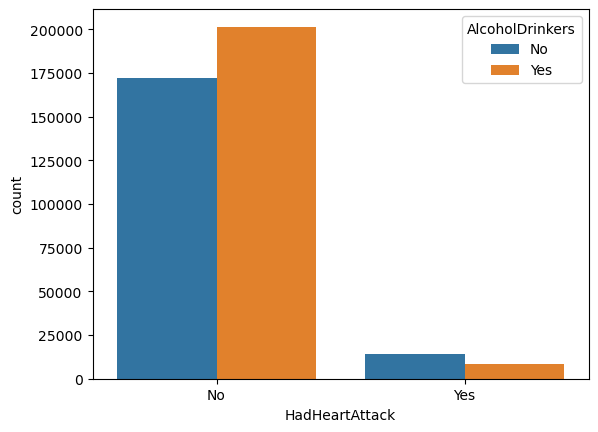


                  GeneralHealth                   


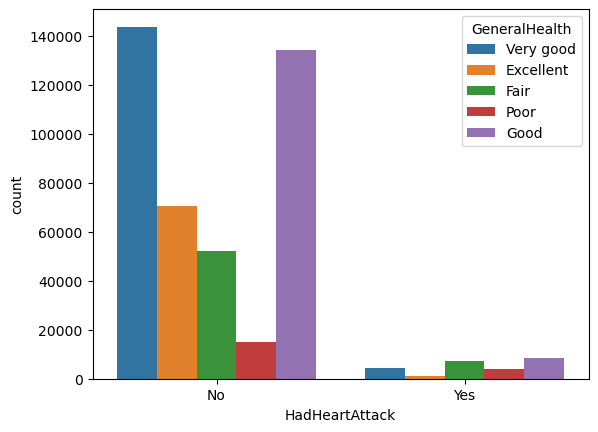


                       Sex                        


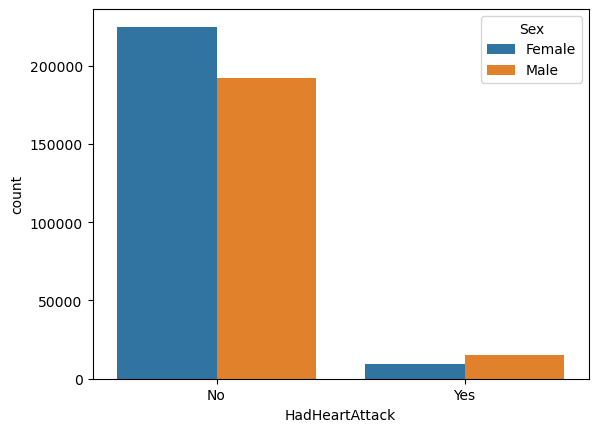


                   AgeCategory                    


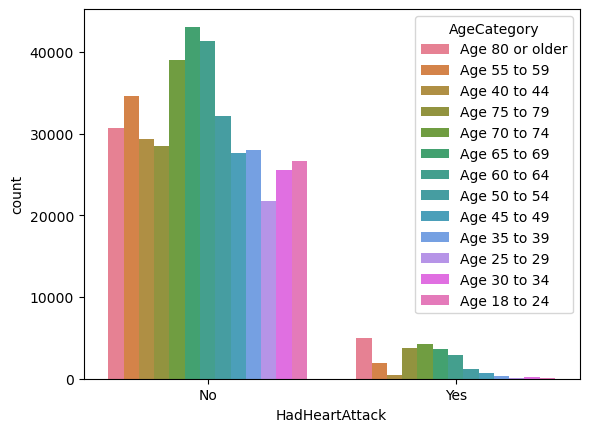

In [23]:
#Separate predictors into categorical and continuous variables
heart_cat = ['HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 
             'HadKidneyDisease', 'HadArthritis', 'HadDiabetes', 'HadDepressiveDisorder', 
             'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating', 
             'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands',
             'PhysicalActivities', 'GeneralHealth', 'RemovedTeeth',  'LastCheckupTime', 'ChestScan',
             'SmokerStatus', 'ECigaretteUsage', 'AlcoholDrinkers', 
             'GeneralHealth', 'Sex', 'AgeCategory']

#For categorical predictors -- plot frequency with group by
# Loop through each categorical column
for column in heart_cat:
    # Print column name as title
    print(f"\033[1m{column.center(50)}\033[0m")
    plot = sns.countplot(x='HadHeartAttack', hue=column, data=heart)
    plt.show()
    # Print an empty line
    print()

Because only 5.7% of the sample had an heart attack (i.e., the groups are really unbalanced), it is difficult to visually examine the relationship of these categorical predictors and heart attack. Despite this limitation, HadAngina, HadArthritis, and Sex seem to be particularly associated with heart attack.

                    SleepHours                    


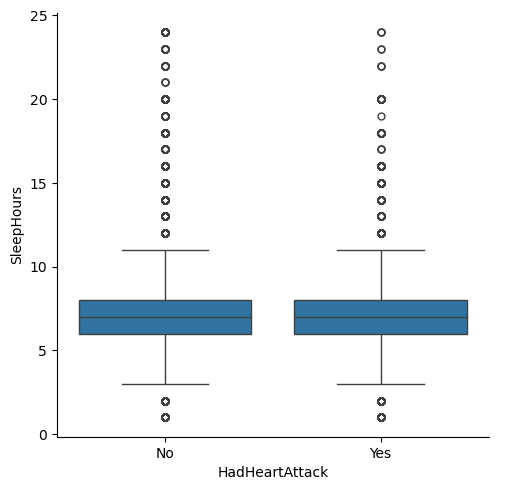


                PhysicalHealthDays                


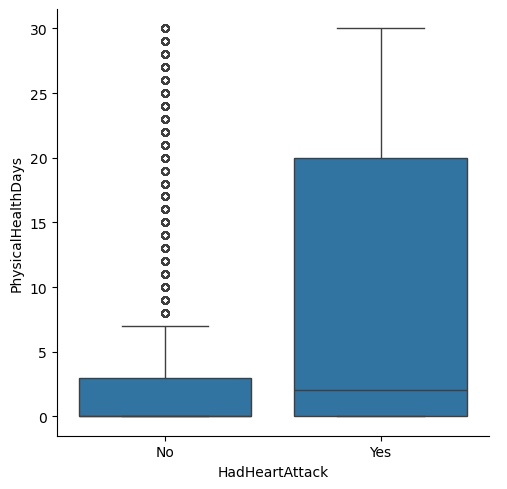


                 MentalHealthDays                 


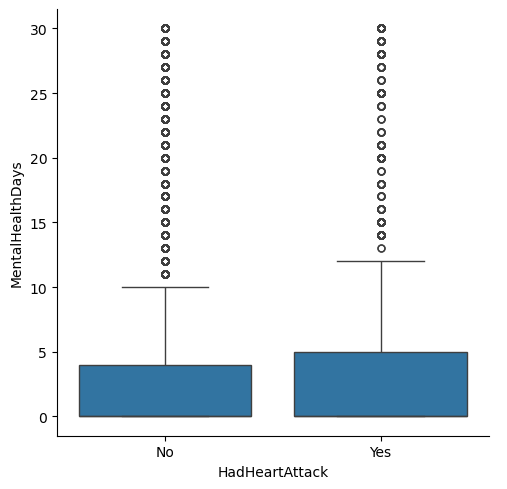


                   AgeCategory                    


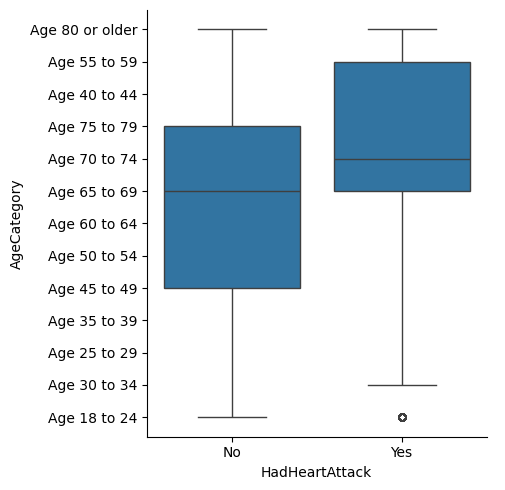


                  HeightInMeters                  


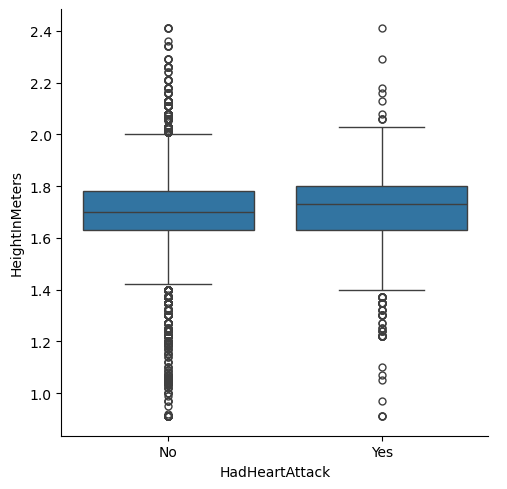


                WeightInKilograms                 


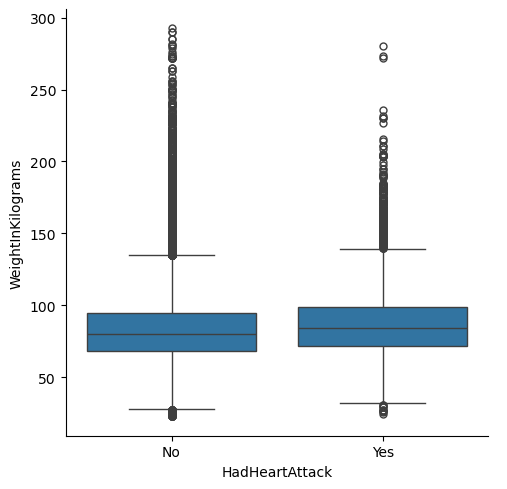


                       BMI                        


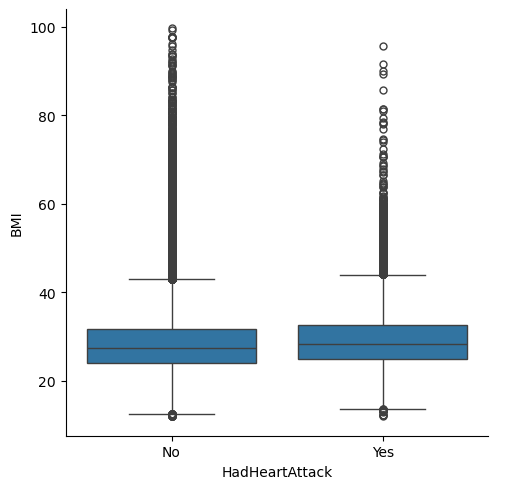

In [24]:
#For continuous predictors -- Boxplot for continuous variables with heart attack
heart_con = ['SleepHours', 'PhysicalHealthDays', 'MentalHealthDays', 
             'AgeCategory', 'HeightInMeters', 'WeightInKilograms', 'BMI']

#Loop through each continuous predictors and plot box plot
for column in heart_con:
    # Print column name as title
    print(f"\033[1m{column.center(50)}\033[0m")
    plot = sns.catplot(x='HadHeartAttack', y=column, data=heart, kind="box")
    plt.show()
    # Print an empty line
    print()

Just by visualing these plots, some variables appear to be related to heart attack. These variables include physical health days and age.

## Feature Engineering

### Recode categorical variables into numbers for subsequent analyses

#### Recode binary (yes and no) variables

In [25]:
#Select binary columns
binarycolumns = ['PhysicalActivities', 'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma',
                'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
                'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating', 'DifficultyWalking',
                'DifficultyDressingBathing', 'DifficultyErrands', 'ChestScan', 'AlcoholDrinkers']

#Create a new dataset
heartn = heart.copy()

for column in binarycolumns:
    heartn[column] = heart[column].map({'Yes': 1, 'No': 0})

#View recoded dataset
heartn.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,0.0,8.0,NaN,0,...,0.0,Never smoked,Not at all (right now),0.0,"White only, Non-Hispanic",Age 80 or older,NaN,NaN,NaN,0.0
1,Alabama,Female,Excellent,0.0,0.0,NaN,0.0,6.0,NaN,0,...,0.0,Never smoked,Never used e-cigarettes in my entire life,0.0,"White only, Non-Hispanic",Age 80 or older,1.60,68.04,26.57,0.0
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,1.0,5.0,NaN,0,...,0.0,Never smoked,Never used e-cigarettes in my entire life,0.0,"White only, Non-Hispanic",Age 55 to 59,1.57,63.50,25.61,0.0
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,1.0,7.0,NaN,0,...,0.0,Current smoker - now smokes some days,Never used e-cigarettes in my entire life,1.0,"White only, Non-Hispanic",NaN,1.65,63.50,23.30,0.0
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,1.0,9.0,NaN,0,...,0.0,Never smoked,Never used e-cigarettes in my entire life,1.0,"White only, Non-Hispanic",Age 40 to 44,1.57,53.98,21.77,1.0


#### Recode other categorical variables (e.g., those that were not yes and no)

In [26]:
#Recode other categorical variables using ordinal encoding
heartn['Female'] = heartn['Sex'].map({'Female': 1, 'Male': 0})
heartn['GeneralHealth'] = heartn['GeneralHealth'].map({'Poor': 0, 'Fair': 1, 'Good': 2, 
                                                       'Very good': 3, 'Excellent': 4})
heartn['LastCheckupTime'] = heartn['LastCheckupTime'].map({'Within past year (anytime less than 12 months ago)': 0, 
                                                         'Within past 2 years (1 year but less than 2 years ago)': 1,
                                                         'Within past 5 years (2 years but less than 5 years ago)': 2,
                                                         '5 or more years ago': 3})
heartn['RemovedTeeth'] = heartn['RemovedTeeth'].map({'None of them': 0, 
                                                   '1 to 5': 1,
                                                   '6 or more, but not all': 2,
                                                   'All': 3})
heartn['HadDiabetes'] = heartn['HadDiabetes'].map({'No': 0, 
                                                 'Yes, but only during pregnancy (female)': 0,
                                                 'No, pre-diabetes or borderline diabetes': 1,
                                                 'Yes': 2})
heartn['SmokerStatus'] = heartn['SmokerStatus'].map({'Never smoked': 0, 
                                                   'Former smoker': 1,
                                                   'Current smoker - now smokes some days': 2,
                                                   'Current smoker - now smokes every day': 3})
heartn['ECigaretteUsage'] = heartn['ECigaretteUsage'].map({'Never used e-cigarettes in my entire life': 0,
                                                         'Not at all (right now)': 1,
                                                         'Use them some days': 2,
                                                         'Use them every day': 3})
heartn['AgeCategory'] = heartn['AgeCategory'].map({'Age 18 to 24': 0, 'Age 25 to 29': 1, 
                                                 'Age 30 to 34': 2, 'Age 35 to 39': 3, 
                                                 'Age 40 to 44': 4, 'Age 45 to 49': 5, 
                                                 'Age 50 to 54': 6, 'Age 55 to 59': 7, 
                                                 'Age 60 to 64': 8, 'Age 65 to 69': 9, 
                                                 'Age 70 to 74': 10, 'Age 75 to 79': 11, 
                                                 'Age 80 or older': 12})

In [27]:
#Recode BMI into ordinal categories
# Function to categorize BMI
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 24.9:
        return 'Normal weight'
    elif 25 <= bmi < 29.9:
        return 'Overweight'
    elif 30 <= bmi < 34.9:
        return 'Obesity I'
    elif 35 <= bmi < 39.9:
        return 'Obesity II'
    else:
        return 'Obesity III'

# Apply function to the BMI column
heartn['BMI_Category'] = heartn['BMI'].apply(categorize_bmi)

# Define a mapping from category to numeric value
category_to_numeric = {
    'Underweight': 0,
    'Normal weight': 1,
    'Overweight': 2,
    'Obesity I': 3,
    'Obesity II': 4,
    'Obesity III': 5
}

# Apply the mapping
heartn['BMI_Category'] = heartn['BMI_Category'].map(category_to_numeric)

#### Plot the relationship between heart attack and ordinal variables after recoding

                  GeneralHealth                   


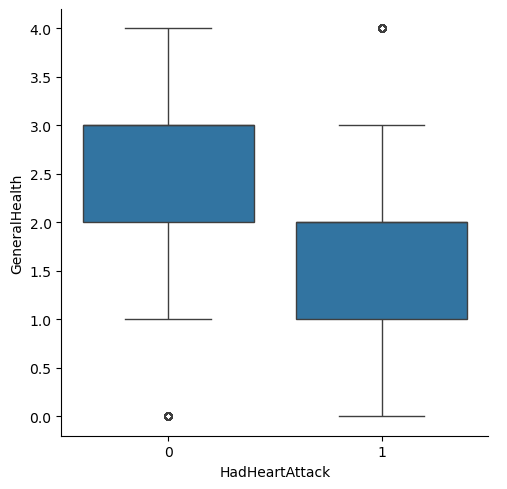


                 LastCheckupTime                  


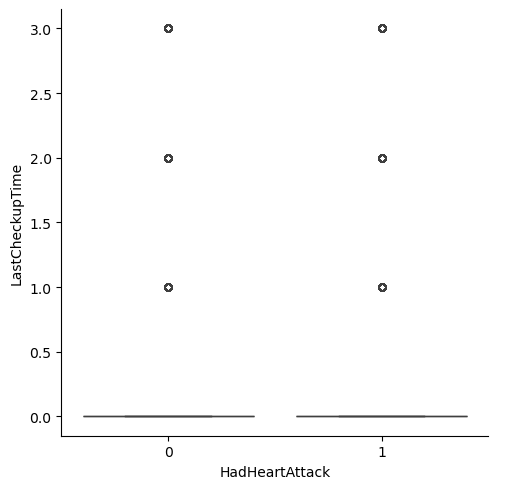


                   RemovedTeeth                   


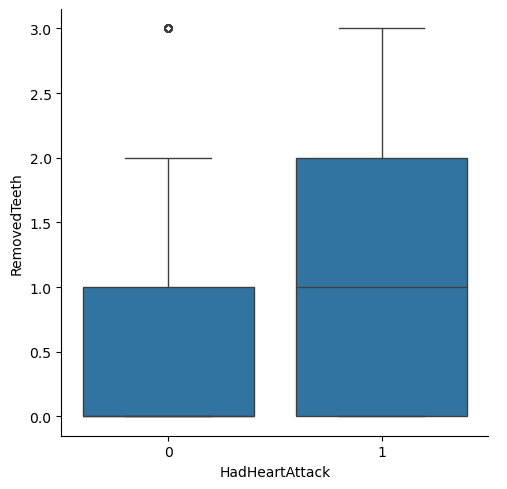


                   HadDiabetes                    


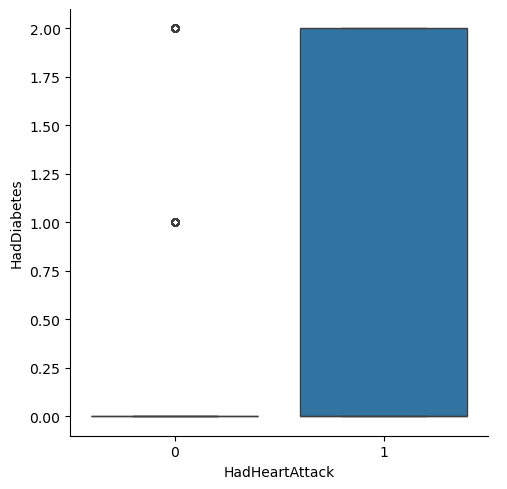


                   SmokerStatus                   


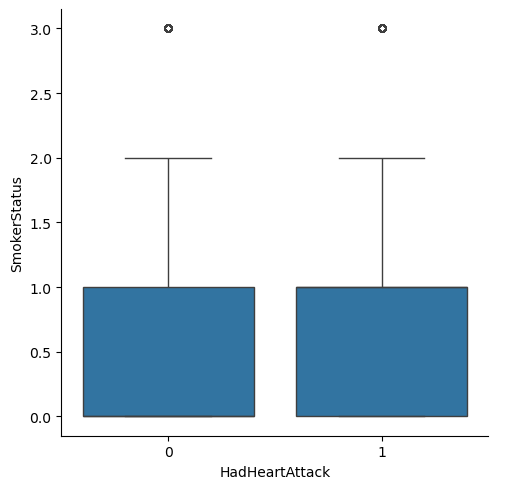


                 ECigaretteUsage                  


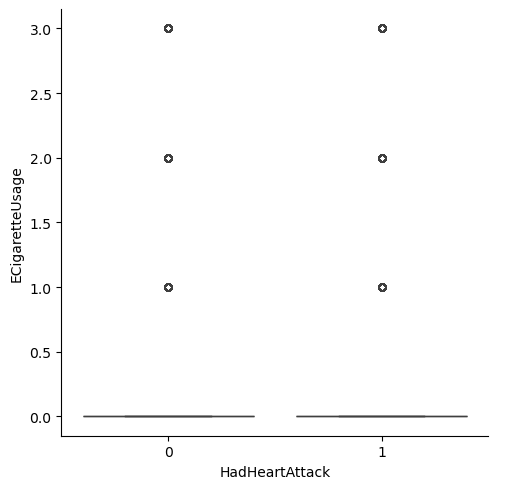


                   AgeCategory                    


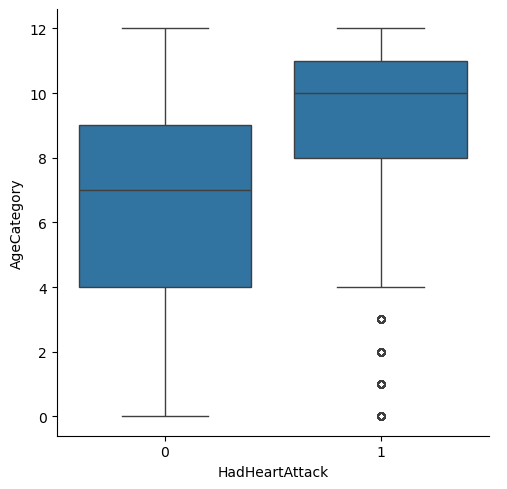


                   BMI_Category                   


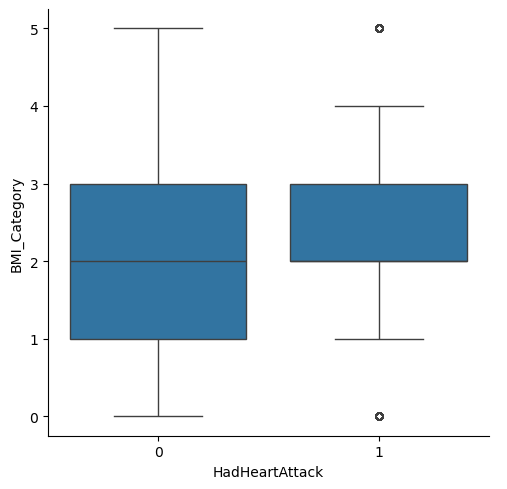

In [28]:
#For ordinal predictors -- Boxplot for ordinal variables with heart attack
heart_ord = ['GeneralHealth', 'LastCheckupTime', 'RemovedTeeth', 'HadDiabetes', 'SmokerStatus', 
             'ECigaretteUsage', 'AgeCategory', 'BMI_Category']

#Loop through each continuous predictors and plot box plot
for column in heart_ord:
    # Print column name as title
    print(f"\033[1m{column.center(50)}\033[0m")
    plot = sns.catplot(x='HadHeartAttack', y=column, data=heartn, kind="box")
    plt.show()
    # Print an empty line
    print()

Based on the boxplot results, heart attack is likely associated with poorer general health, more removed teeth, and older age.

#### Drop variables with duplicated information

In [29]:
#Drop height, weight, and BMI columns because they overlap with BMI category, and the Sex column because it the same as the Female column. 
heartn = heartn.drop(['HeightInMeters', 'WeightInKilograms', 'BMI', 'Sex'], axis=1)

In [30]:
#Recode race/ethnicity using one-hot encoding (for machine learning models)
heart_one_hot = pd.get_dummies(heartn, columns=['RaceEthnicityCategory'])
heart_one_hot.head()

,State,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,...,ChestScan,AgeCategory,AlcoholDrinkers,Female,BMI_Category,"RaceEthnicityCategory_Black only, Non-Hispanic",RaceEthnicityCategory_Hispanic,"RaceEthnicityCategory_Multiracial, Non-Hispanic","RaceEthnicityCategory_Other race only, Non-Hispanic","RaceEthnicityCategory_White only, Non-Hispanic"
0,Alabama,3.0,0.0,0.0,0.0,0.0,8.0,NaN,0,0.0,...,0.0,12.0,0.0,1,5,False,False,False,False,True
1,Alabama,4.0,0.0,0.0,NaN,0.0,6.0,NaN,0,0.0,...,0.0,12.0,0.0,1,2,False,False,False,False,True
2,Alabama,3.0,2.0,3.0,0.0,1.0,5.0,NaN,0,0.0,...,0.0,7.0,0.0,1,2,False,False,False,False,True
3,Alabama,4.0,0.0,0.0,0.0,1.0,7.0,NaN,0,0.0,...,1.0,NaN,0.0,1,1,False,False,False,False,True
4,Alabama,1.0,2.0,0.0,0.0,1.0,9.0,NaN,0,0.0,...,1.0,4.0,1.0,1,1,False,False,False,False,True


In [31]:
#Recode race/ethnicity using one-hot encoding (for machine learning models)
heart_one_hot = pd.get_dummies(heartn, columns=['RaceEthnicityCategory'])

#Rename the categories
heart_one_hot = heart_one_hot.rename(columns={
    'RaceEthnicityCategory_White only, Non-Hispanic': 'Non_Hispanic_White',
    'RaceEthnicityCategory_Black only, Non-Hispanic': 'Non_Hispanic_Black',
    'RaceEthnicityCategory_Other race only, Non-Hispanic': 'Non_Hispanic_other',
    'RaceEthnicityCategory_Multiracial, Non-Hispanic': 'Non_Hispanic_multiracial',
    'RaceEthnicityCategory_Hispanic': 'Hispanic'
})

#Recode race/enthnicity using dummy coding (for linear models to avoid multicollinearity)
heart_dummy = heart_one_hot.drop('Non_Hispanic_White', axis=1)

In [32]:
print(heartn.info())
heartn.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442067 entries, 0 to 442066
Data columns (total 32 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      442067 non-null  object 
 1   GeneralHealth              440972 non-null  float64
 2   PhysicalHealthDays         431470 non-null  float64
 3   MentalHealthDays           433275 non-null  float64
 4   LastCheckupTime            434026 non-null  float64
 5   PhysicalActivities         441095 non-null  float64
 6   SleepHours                 436871 non-null  float64
 7   RemovedTeeth               431057 non-null  float64
 8   HadHeartAttack             442067 non-null  int64  
 9   HadAngina                  438479 non-null  float64
 10  HadStroke                  440997 non-null  float64
 11  HadAsthma                  440630 non-null  float64
 12  HadSkinCancer              439303 non-null  float64
 13  HadCOPD                    44

,State,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,...,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,AlcoholDrinkers,Female,BMI_Category
0,Alabama,3.0,0.0,0.0,0.0,0.0,8.0,NaN,0,0.0,...,0.0,0.0,0.0,1.0,0.0,"White only, Non-Hispanic",12.0,0.0,1,5
1,Alabama,4.0,0.0,0.0,NaN,0.0,6.0,NaN,0,0.0,...,0.0,0.0,0.0,0.0,0.0,"White only, Non-Hispanic",12.0,0.0,1,2
2,Alabama,3.0,2.0,3.0,0.0,1.0,5.0,NaN,0,0.0,...,0.0,0.0,0.0,0.0,0.0,"White only, Non-Hispanic",7.0,0.0,1,2
3,Alabama,4.0,0.0,0.0,0.0,1.0,7.0,NaN,0,0.0,...,0.0,0.0,2.0,0.0,1.0,"White only, Non-Hispanic",NaN,0.0,1,1
4,Alabama,1.0,2.0,0.0,0.0,1.0,9.0,NaN,0,0.0,...,0.0,0.0,0.0,0.0,1.0,"White only, Non-Hispanic",4.0,1.0,1,1


In [33]:
print(heart_one_hot.info())
heart_one_hot.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442067 entries, 0 to 442066
Data columns (total 36 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      442067 non-null  object 
 1   GeneralHealth              440972 non-null  float64
 2   PhysicalHealthDays         431470 non-null  float64
 3   MentalHealthDays           433275 non-null  float64
 4   LastCheckupTime            434026 non-null  float64
 5   PhysicalActivities         441095 non-null  float64
 6   SleepHours                 436871 non-null  float64
 7   RemovedTeeth               431057 non-null  float64
 8   HadHeartAttack             442067 non-null  int64  
 9   HadAngina                  438479 non-null  float64
 10  HadStroke                  440997 non-null  float64
 11  HadAsthma                  440630 non-null  float64
 12  HadSkinCancer              439303 non-null  float64
 13  HadCOPD                    44

,State,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,...,ChestScan,AgeCategory,AlcoholDrinkers,Female,BMI_Category,Non_Hispanic_Black,Hispanic,Non_Hispanic_multiracial,Non_Hispanic_other,Non_Hispanic_White
0,Alabama,3.0,0.0,0.0,0.0,0.0,8.0,NaN,0,0.0,...,0.0,12.0,0.0,1,5,False,False,False,False,True
1,Alabama,4.0,0.0,0.0,NaN,0.0,6.0,NaN,0,0.0,...,0.0,12.0,0.0,1,2,False,False,False,False,True
2,Alabama,3.0,2.0,3.0,0.0,1.0,5.0,NaN,0,0.0,...,0.0,7.0,0.0,1,2,False,False,False,False,True
3,Alabama,4.0,0.0,0.0,0.0,1.0,7.0,NaN,0,0.0,...,1.0,NaN,0.0,1,1,False,False,False,False,True
4,Alabama,1.0,2.0,0.0,0.0,1.0,9.0,NaN,0,0.0,...,1.0,4.0,1.0,1,1,False,False,False,False,True


In [34]:
print(heart_dummy.info())
heart_dummy.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442067 entries, 0 to 442066
Data columns (total 35 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      442067 non-null  object 
 1   GeneralHealth              440972 non-null  float64
 2   PhysicalHealthDays         431470 non-null  float64
 3   MentalHealthDays           433275 non-null  float64
 4   LastCheckupTime            434026 non-null  float64
 5   PhysicalActivities         441095 non-null  float64
 6   SleepHours                 436871 non-null  float64
 7   RemovedTeeth               431057 non-null  float64
 8   HadHeartAttack             442067 non-null  int64  
 9   HadAngina                  438479 non-null  float64
 10  HadStroke                  440997 non-null  float64
 11  HadAsthma                  440630 non-null  float64
 12  HadSkinCancer              439303 non-null  float64
 13  HadCOPD                    44

,State,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,...,ECigaretteUsage,ChestScan,AgeCategory,AlcoholDrinkers,Female,BMI_Category,Non_Hispanic_Black,Hispanic,Non_Hispanic_multiracial,Non_Hispanic_other
0,Alabama,3.0,0.0,0.0,0.0,0.0,8.0,NaN,0,0.0,...,1.0,0.0,12.0,0.0,1,5,False,False,False,False
1,Alabama,4.0,0.0,0.0,NaN,0.0,6.0,NaN,0,0.0,...,0.0,0.0,12.0,0.0,1,2,False,False,False,False
2,Alabama,3.0,2.0,3.0,0.0,1.0,5.0,NaN,0,0.0,...,0.0,0.0,7.0,0.0,1,2,False,False,False,False
3,Alabama,4.0,0.0,0.0,0.0,1.0,7.0,NaN,0,0.0,...,0.0,1.0,NaN,0.0,1,1,False,False,False,False
4,Alabama,1.0,2.0,0.0,0.0,1.0,9.0,NaN,0,0.0,...,0.0,1.0,4.0,1.0,1,1,False,False,False,False


In [35]:
# Check frequencies to see if the variables were coded correctly
col_list = heartn.columns.tolist()
print(col_list)

freq_columns = heartn[['State', 'Female', 'GeneralHealth', 
                       'LastCheckupTime', 'PhysicalActivities', 'RemovedTeeth', 
                       'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 
                       'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 
                       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 
                       'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing',
                       'DifficultyErrands', 'SmokerStatus', 'ECigaretteUsage', 'ChestScan', 
                       'RaceEthnicityCategory', 'AgeCategory', 'AlcoholDrinkers', 'BMI_Category']]

# Loop through each categorical column
for column in freq_columns:
    counts = heartn[column].value_counts()
    percs = heartn[column].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
    # Print column name as title
    print(f"\033[1m{column.center(50)}\033[0m")
    # Print an empty line
    print()
    # Print the statistics
    print(pd.concat([counts,percs], axis=1, keys=['count', 'percentage']))
    
# Add a separator
    print("\n" + "="*50 + "\n")


['State', 'GeneralHealth', 'PhysicalHealthDays', 'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities', 'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus', 'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory', 'AlcoholDrinkers', 'Female', 'BMI_Category']
                      State                       

                      count percentage
State                                 
Washington            25997       5.9%
New York              17631       4.0%
Minnesota             16738       3.8%
Ohio                  16394       3.7%
Maryland              16299       3.7%
Texas                 14129       3.2%
Florida               13282       3.0%
Wisconsin      

Yes, they are coded correctly.

### Explore relationships between heart attack and potential predictors using correlations

In [36]:
#Select numeric variables
heart_num = heart_one_hot.select_dtypes(exclude='object')
col_list = heart_num.columns.tolist()
print(col_list)

['GeneralHealth', 'PhysicalHealthDays', 'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities', 'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus', 'ECigaretteUsage', 'ChestScan', 'AgeCategory', 'AlcoholDrinkers', 'Female', 'BMI_Category', 'Non_Hispanic_Black', 'Hispanic', 'Non_Hispanic_multiracial', 'Non_Hispanic_other', 'Non_Hispanic_White']


In [37]:
#Reorder variables in the dataset for easier exploration
heart_num_var = ['HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma', 
                 'HadSkinCancer', 'HadCOPD', 'HadKidneyDisease', 'HadArthritis', 'HadDiabetes', 
                 'HadDepressiveDisorder', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 
                 'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing', 
                 'DifficultyErrands',
                 'PhysicalActivities', 'SleepHours', 'RemovedTeeth',  'LastCheckupTime', 'ChestScan',
                 'SmokerStatus', 'ECigaretteUsage', 'AlcoholDrinkers', 
                 'GeneralHealth', 'PhysicalHealthDays', 'MentalHealthDays', 
                 'Female', 'AgeCategory', 'BMI_Category', 
                 'Non_Hispanic_White', 'Non_Hispanic_Black', 'Non_Hispanic_other',
                 'Non_Hispanic_multiracial', 'Hispanic']

heart_num = heart_num[heart_num_var]

#Correlation
heart_num.corr().round(2)

,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadKidneyDisease,HadArthritis,HadDiabetes,HadDepressiveDisorder,...,PhysicalHealthDays,MentalHealthDays,Female,AgeCategory,BMI_Category,Non_Hispanic_White,Non_Hispanic_Black,Non_Hispanic_other,Non_Hispanic_multiracial,Hispanic
HadHeartAttack,1.00,0.44,0.19,0.03,0.05,0.14,0.12,0.12,0.15,0.03,...,0.14,0.03,-0.07,0.18,0.01,0.03,-0.01,-0.01,0.00,-0.03
HadAngina,0.44,1.00,0.15,0.04,0.08,0.16,0.15,0.15,0.16,0.03,...,0.15,0.03,-0.06,0.20,0.02,0.04,-0.02,-0.02,-0.00,-0.04
HadStroke,0.19,0.15,1.00,0.04,0.04,0.11,0.09,0.11,0.11,0.05,...,0.14,0.05,-0.00,0.14,0.00,0.00,0.02,-0.01,0.01,-0.03
HadAsthma,0.03,0.04,0.04,1.00,0.00,0.20,0.04,0.10,0.05,0.15,...,0.12,0.13,0.08,-0.05,0.07,-0.01,0.01,-0.01,0.03,0.00
HadSkinCancer,0.05,0.08,0.04,0.00,1.00,0.05,0.06,0.13,0.03,-0.01,...,0.03,-0.04,0.00,0.24,-0.05,0.14,-0.08,-0.06,-0.02,-0.08
HadCOPD,0.14,0.16,0.11,0.20,0.05,1.00,0.10,0.18,0.11,0.13,...,0.22,0.10,0.03,0.15,0.03,0.04,-0.00,-0.03,0.01,-0.05
HadKidneyDisease,0.12,0.15,0.09,0.04,0.06,0.10,1.00,0.13,0.17,0.05,...,0.14,0.04,0.01,0.14,0.03,0.01,0.01,-0.01,0.00,-0.02
HadArthritis,0.12,0.15,0.11,0.10,0.13,0.18,0.13,1.00,0.17,0.12,...,0.24,0.07,0.10,0.40,0.07,0.10,-0.00,-0.06,-0.01,-0.10
HadDiabetes,0.15,0.16,0.11,0.05,0.03,0.11,0.17,0.17,1.00,0.05,...,0.16,0.03,-0.02,0.22,0.14,-0.04,0.06,0.01,0.00,0.01
HadDepressiveDisorder,0.03,0.03,0.05,0.15,-0.01,0.13,0.05,0.12,0.05,1.00,...,0.21,0.43,0.13,-0.11,0.05,0.04,-0.03,-0.04,0.03,-0.01


### Visualize the correlations using a heatmap

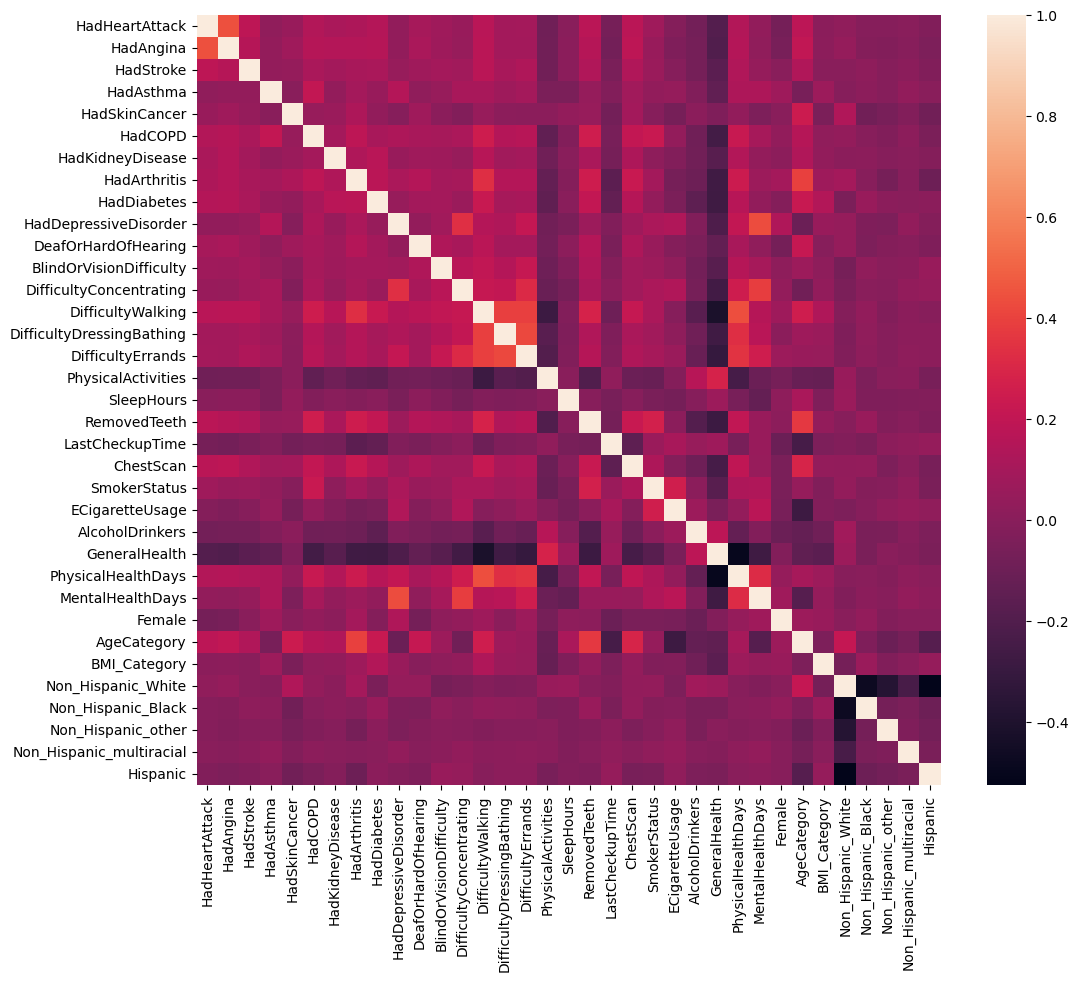

In [38]:
# Make a heatmap of the data
plt.figure(figsize=(12, 10))
sns.heatmap(heart_num.corr())
plt.show()

Similar to information in correlation table, HadAngina has the highest positive correlation with heart attack. Difficulty with walking, removed teeth, chest scan, physical health days, and age category seems to correlate positively with heart attack. Note that physical health days and mental health days actually refer to days when physical health or mental health was not good, respectively.

### Feature selection

List variables with corrrelation >= |0.1| with heart attack.

In [39]:
#Select variables with correlations > 0.1 with heart attack
#Select first column correlations
first_col = heart_num.corr().iloc[:,0]
#Select the corresponding index and output as a list
vars = first_col[abs(first_col) >= 0.1].index.tolist()
#Exclude the self correlation
vars = [var for var in vars if var != first_col.name]
print(vars)

['HadAngina', 'HadStroke', 'HadCOPD', 'HadKidneyDisease', 'HadArthritis', 'HadDiabetes', 'DeafOrHardOfHearing', 'DifficultyWalking', 'RemovedTeeth', 'ChestScan', 'GeneralHealth', 'PhysicalHealthDays', 'AgeCategory']


### Create a trimmed dataset with this subset of variables

In [40]:
#Trim dataset to most relevant predictors and the outcome
heartdf = heart_one_hot[['HadHeartAttack', 'HadAngina', 'HadStroke', 'HadCOPD', 'HadKidneyDisease',
                         'HadArthritis', 'HadDiabetes', 
                         'DeafOrHardOfHearing', 'DifficultyWalking', 'RemovedTeeth', 'ChestScan', 
                         'GeneralHealth', 'PhysicalHealthDays', 'AgeCategory']]

### Save datasets

In [41]:
#One-hot encoding (race)
path = 'D:\\Springboard\\Projects\\capstone2\\Heart-Attack\\data\\'
heart_one_hot.to_csv(path+'heartattack_one_hot.csv', index=False)

#Dummy encoding (race)
path = 'D:\\Springboard\\Projects\\capstone2\\Heart-Attack\\data\\'
heart_dummy.to_csv(path+'heartattack_dummy.csv', index=False)

#Trimmed data
path = 'D:\\Springboard\\Projects\\capstone2\\Heart-Attack\\data\\'
heartdf.to_csv(path+'heartattack_trimmed.csv', index=False)

## Summary

For exploratory data analyses, I used the dataset created previously after data wrangling. I read in the data and started doing some data explorations. First, I examined the dimensions of the dataset, the variables in it, and the data types of the variables. The dataset contains 442067 observations (participants) and 34 variables. Then, I ran some descriptive statistics on the binary dependent variable -- Had Heart Attack. There were 5.7% of the participants had heart attack. Then I examined the descriptive statistics of all categorical and continuous variables in the dataset. Next, I examined the participants' demographic characteristics, including sex, race, age, and their intersections. Of all participants in the dataset, 53% were female, 74% were Non-Hispanic White, 100% were adults with more participants in the age 55 to 75 categories. Most participants reported that their health was good (32%) and very good (34%).

In the next step, I explore the relationship between heart attack and other potential predictors. I examined the relationship of heart attack with other categorical variables, including angina, participants' demographics, other health conditions, and lifestyle factors. Because only 5.7% of the sample had an heart attack (i.e., the groups are really unbalanced), it is difficult to visually examine the relationships between these categorical predictors and heart attack. Despite this limitation, HadAngina, HadArthritis, Age (being older), and Sex (being male) seemed to be particularly associated with heart attack. Next I examined the relationships of heart attack with the remaining continuous variables. The number of self-reported physically unhealthy days appeared to be associated with health attack.

Before exploring further, I recoded the categorical variables into numbers. First, I recoded the binary variables into 0 and 1. Next, I recoded the majority of the categorical variabels using ordinal encoding (integers) because those variables were mostly ordinal in nature, except state and race/ethnicity. I also recoded BMI using ordinal encoding and dropped the weight, height, and BMI columns because they overlapped with BMI_Category. Then, I recoded race/ethnicity using two different methods. I recoded race using one-hot encoding for subsequent machine learning analyses where there are no assumptions about the predictors. I also recoded race using dummy encoding for subsequent linear modeling where multicollinearity should be avoided.

Next, I explored the relationships between heart attack and other predictors using correlations and heatmap. Then, I selected the most relevant features where the absolute values of correlations are >= 0.1. These variables were HadAngina (r = .44), HadStroke (r = .19), HadCOPD (r = .14), HadKidneyDisease (r = .12), HadArthritis (r = .12), HadDiabetes (r = .15), DeafOrHardOfHearing (r = .10), DifficultyWalking (r = .17), RemovedTeeth (r = .17), ChestScan (r = .17), GeneralHealth (r = -.19), PhysicalHealthDays (r = .14), AgeCategory (r = .18).

Finally I saved three datasets for subsequent modeling, including a full dataset with one-hot encoding for race, a full dataset with dummy coding for race, and a trimmed dataset with variables which correlations with heart attack were greater than 0.1. I will examine the performace of various models built using variables from these datasets.